# Mesh visualizations


Just check whether the points are loaded by displaying them.

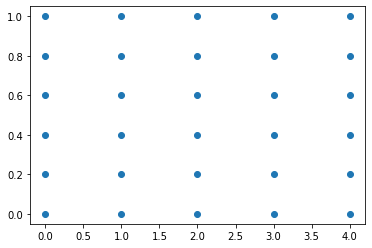

In [35]:
import openmesh as om
import matplotlib.pyplot as plt

mesh = om.read_trimesh('dm.off')
P = mesh.points()

plt.plot(P[:,0], P[:,1], 'o')
plt.show()

Iterate over vertices to read the points. (This is not necessary and can be done another way.)

In [36]:
import numpy as np
P = mesh.points()
nv=len(P)
f=np.zeros(nv)
phi=np.zeros(nv)
X=np.zeros(nv)
Y=np.zeros(nv)
BND=np.zeros(nv)
s=np.zeros(nv)

k=0;
for vh in mesh.vertices():
    p = mesh.point(vh)
    # print(vh.idx(),': ', p)
    X[k] = p[0]
    Y[k] = p[1]
    f[k] = X[k]**2+Y[k]**2
    phi[k] = X[k]**2+Y[k]**2
    s[k] = X[k]**2+Y[k]**2    
    k+=1

---

Iterate over faces in order to calculate barycenters.
This is done by generate a local list of local vertex coordinates and then average over them.

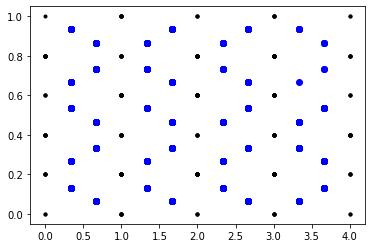

In [37]:
# this is a test routine version...
Xbar = []
Ybar = []

for fh in mesh.faces():
    nCell = fh.idx()

    Xloc = [] 
    Yloc = []
    for vh in mesh.fv(fh):
        p = mesh.point(vh)
        Xloc.append(p[0])
        Yloc.append(p[1])
        plt.plot(Xloc, Yloc, '.k')
    
    Xbar.append(sum(Xloc)/3)
    Ybar.append(sum(Yloc)/3)    
    plt.plot(Xbar, Ybar, 'ob')

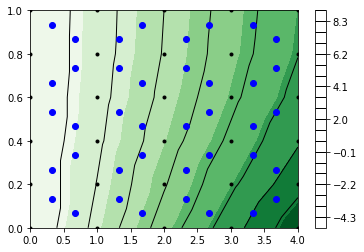

In [38]:
import numpy as np

Z = X*(1+0.5*(1-Y)**2)

plt.plot(Xbar, Ybar, 'ob')
plt.plot(X, Y, '.k')

cmap = plt.get_cmap('Greens')
# cmap=plt.cm.coolwarm
levels = np.linspace(-5, 9, 21)
# plt.tricontourf(X,Y,Z)
plt.tricontourf(X, Y, Z, cmap=cmap , zorder=1) # extent=[x0, y0, x1, y1],
plt.tricontour(X, Y, Z, colors='k' , zorder=1,linewidths=1, levels=levels)
plt.colorbar()


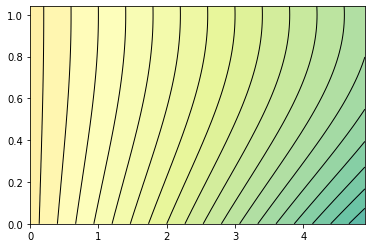

In [39]:
import openmesh as om
import numpy as np

mesh = om.read_trimesh('dmm.off')
P = mesh.points()
X=P[:,0]
Y=P[:,1]
# Z = X**0.5 + (1-Y)**3
# Z = X + X*(1-Y)**2
Z = X*(1+0.5*(1-Y)**2)

levels = np.linspace(-9, 11, 51)
cmap =  plt.get_cmap('Spectral')
# cmap =  plt.get_cmap('Greys')
plt.tricontourf(X, Y, Z, cmap=cmap , zorder=1, levels=levels) # extent=[x0, y0, x1, y1],
plt.tricontour(X, Y, Z, colors='k' , zorder=1,linewidths=1, levels=levels) # extent=[x0, y0, x1, y1],
# plt.plot(X, Y, '.k', markersize=2)

## Experiment with the weighting function


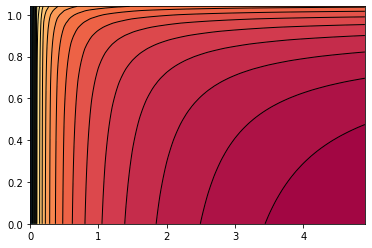

In [103]:
import math
W=1/((0.1*X**2+1*(1-Y)**2+1e-2)**0.25)
W=(8/(X+1e-2) + 1/(1.1-Y))**0.25
# print(min(W),max(W))

levels = np.linspace(-15, 15, 21)
levels=np.logspace(math.log10(min(W)), math.log10(max(W)), 25)  # 5 data points between 10**0=1 to 10**2=100
plt.tricontourf(X, Y, W, cmap=cmap , zorder=1, levels=levels)
plt.tricontour(X, Y, W, colors='k' , zorder=1,linewidths=1, levels=levels)

# Weights

Estimate weightings functions for the non-linear system

The function should be something like
\begin{align*}
    z=\Bigl( \frac{1}{x^2+(1-y)^2}\Bigr)^{1/4}
\end{align*}


            z=1/(x**2+(1-y)**2)**(1/4)


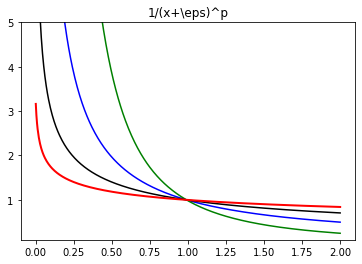

In [104]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

x = np.linspace(0, 2, 500)
plt.plot(x, (1/(x+0.01)**1),'b-')
plt.plot(x, (1/(x+0.01)**2),'g-')
plt.plot(x, (1/(x+0.01)**0.5),'k-')
plt.plot(x, (1/(x+0.01)**0.25),'r-',linewidth=2)
# plt.semilogy(x, (1/(x+0.01)**0.25),'r-',linewidth=2)

plt.title('1/(x+\eps)^p')
plt.ylim([0.1,1e4])
plt.ylim([0.1,5])
plt.show()

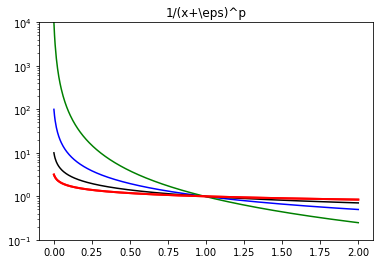

In [105]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

x = np.linspace(0, 2, 500)
plt.plot(x, (1/(x+0.01)**1),'b-')
plt.plot(x, (1/(x+0.01)**2),'g-')
plt.plot(x, (1/(x+0.01)**0.5),'k-')
plt.plot(x, (1/(x+0.01)**0.25),'r-',linewidth=2)
plt.semilogy(x, (1/(x+0.01)**0.25),'r-',linewidth=2)

plt.title('1/(x+\eps)^p')
plt.ylim([0.1,1e4])
plt.show()

### Reference inline mesh generation


In [40]:
import openmesh as om
import numpy as np

mesh = om.TriMesh()

# add a a couple of vertices to the mesh
vh0 = mesh.add_vertex([0, 1, 0])
vh1 = mesh.add_vertex([1, 0, 0])
vh2 = mesh.add_vertex([2, 1, 0])
vh3 = mesh.add_vertex([0,-1, 0])
vh4 = mesh.add_vertex([2,-1, 0])

# add a couple of faces to the mesh
fh0 = mesh.add_face(vh0, vh1, vh2)
fh1 = mesh.add_face(vh1, vh3, vh4)
fh2 = mesh.add_face(vh0, vh3, vh1)

# add another face to the mesh, this time using a list
vh_list = [vh2, vh1, vh4]
fh3 = mesh.add_face(vh_list)

#  0 ==== 2
#  |\  0 /|
#  | \  / |
#  |2  1 3|
#  | /  \ |
#  |/  1 \|
#  3 ==== 4

# get the point with vertex handle vh0
point = mesh.point(vh0)

# get all points of the mesh
point_array = mesh.points()

# translate the mesh along the x-axis
point_array += np.array([1, 0, 0])

# write and read meshes
om.write_mesh('test.off', mesh)
mesh_2 = om.read_trimesh('test.off')
